In [3]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from statannot import add_stat_annotation

In [4]:
hr1_5=pd.read_excel("nluc_6_28_21_1.5hr.xlsx",index_col=0)
hr1_5

1       2       3       4       5          6       7       8       9   \
A  460369  555704  409905  455779  387543  405234.72  450781  559407  487351   
B  495338  523351  432085  454651  366228  391941.00  388991  590835  499890   
C  504325  485797  409605  479852  310648  406018.80  262395  557687  483069   
D  488020  495706  430708  468851  339013  366854.40  353862  579318  445103   
E  486928  515637  429812  455626  333768  352693.44  451266  582893  462996   
F  503182  492201  440635  456365  299944  336807.24  392877  577715  460738   
G  520138  515034  390519  457788  323417  344190.66  343364  525411  460188   
H  555774  480051  410964  441964  324912  316865.34  379002  590258  468022   

       10      11      12  
A  490252  454321  683829  
B  516931  450270  570721  
C  415292  296382  599919  
D  432643  467319  735123  
E  443914  426706  504592  
F  411926  436544  527247  
G  403195  438584  602198  
H  446069  440212  578870

In [5]:
new_drug_np=[]
family=[4,5,8]
dose=[0,0.6,1.5,6]

for row in hr1_5.itertuples():
    i=0
    print(row)
    for value in row[1:]:
        if value<1000:
            pass
        else:
            new_drug_np.append([value,family[i//4],dose[i%4],1.5])   
        i+=1        
        
new_drug_df15=pd.DataFrame(new_drug_np)
new_drug_df15.columns=["RFUs","Family","Dose","Hours post Treatment"]
new_drug_df15

Pandas(Index='A', _1=460369, _2=555704, _3=409905, _4=455779, _5=387543, _6=405234.72000000003, _7=450781, _8=559407, _9=487351, _10=490252, _11=454321, _12=683829)
Pandas(Index='B', _1=495338, _2=523351, _3=432085, _4=454651, _5=366228, _6=391941.0, _7=388991, _8=590835, _9=499890, _10=516931, _11=450270, _12=570721)
Pandas(Index='C', _1=504325, _2=485797, _3=409605, _4=479852, _5=310648, _6=406018.80000000005, _7=262395, _8=557687, _9=483069, _10=415292, _11=296382, _12=599919)
Pandas(Index='D', _1=488020, _2=495706, _3=430708, _4=468851, _5=339013, _6=366854.4, _7=353862, _8=579318, _9=445103, _10=432643, _11=467319, _12=735123)
Pandas(Index='E', _1=486928, _2=515637, _3=429812, _4=455626, _5=333768, _6=352693.44, _7=451266, _8=582893, _9=462996, _10=443914, _11=426706, _12=504592)
Pandas(Index='F', _1=503182, _2=492201, _3=440635, _4=456365, _5=299944, _6=336807.24, _7=392877, _8=577715, _9=460738, _10=411926, _11=436544, _12=527247)
Pandas(Index='G', _1=520138, _2=515034, _3=39051

RFUs  Family  Dose  Hours post Treatment
0   460369.0       4   0.0                   1.5
1   555704.0       4   0.6                   1.5
2   409905.0       4   1.5                   1.5
3   455779.0       4   6.0                   1.5
4   387543.0       5   0.0                   1.5
..       ...     ...   ...                   ...
91  590258.0       5   6.0                   1.5
92  468022.0       8   0.0                   1.5
93  446069.0       8   0.6                   1.5
94  440212.0       8   1.5                   1.5
95  578870.0       8   6.0                   1.5

[96 rows x 4 columns]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1.5_4 v.s. 1.5_5: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.700e+01
1.5_5 v.s. 1.5_8: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.700e+01
0.6_5 v.s. 0.6_8: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.337e-02 U_stat=2.000e+00
6.0_4 v.s. 6.0_5: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.127e-02 U_stat=0.000e+00
6.0_5 v.s. 6.0_8: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.400e+01
0.0_4 v.s. 0.0_5: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.127e-02 U_stat=6.400e+01
0.0_5 v.s. 0.0_8: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.127e-02 U_stat=0.000e+00
0.6_4 v.s. 0.6_5: Mann-W

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8679a34a90>,
  <statannot.StatResult.StatResult at 0x7f8679d2bac8>])

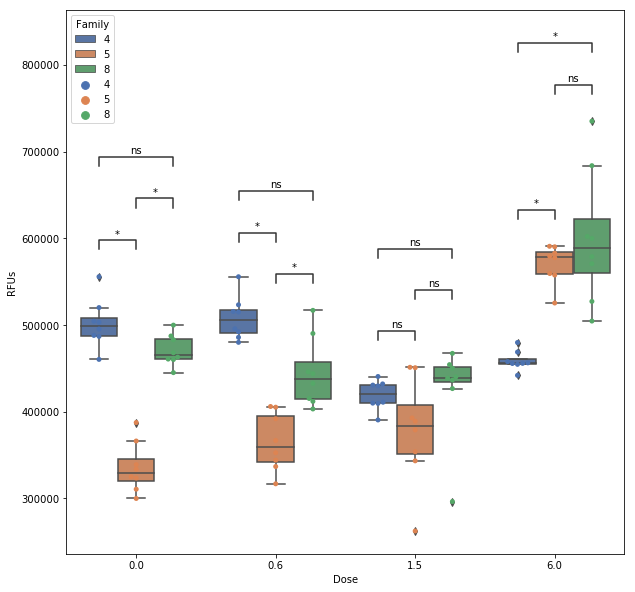

In [23]:
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(ax=ax,x="Dose", y="RFUs",data=new_drug_df15, hue="Family", palette="deep")
sns.swarmplot(ax=ax,x="Dose", y="RFUs",data=new_drug_df15,hue="Family",dodge=True,size=5,palette="deep")
box_pairs=[
    ((0,4),(0,5)),
    ((0,4),(0,8)),
    ((0,5),(0,8)),
    ((1.5,4),(1.5,5)),
    ((1.5,4),(1.5,8)),
    ((1.5,5),(1.5,8)),
    ((0.6,4),(0.6,5)),
    ((0.6,4),(0.6,8)),
    ((0.6,5),(0.6,8)),
    ((6,4),(6,5)),
    ((6,4),(6,8)),
    ((6,5),(6,8))
   
   

]
add_stat_annotation(ax=ax, data=new_drug_df15, x="Dose", y="RFUs",hue="Family", text_format='star', loc='inside', verbose=2,test="Mann-Whitney",box_pairs=box_pairs)

Pandas(Index='A', _1=2, _2=2, _3=4, _4=2, _5=995973.0, _6=969532, _7=952127, _8=818014, _9=812717, _10=812184, _11=860296, _12=914783)
Pandas(Index='B', _1=2, _2=3, _3=3, _4=5, _5=1001256.0, _6=848000, _7=912241, _8=753233, _9=781236, _10=644688, _11=819493, _12=876895)
Pandas(Index='C', _1=3, _2=775366, _3=4, _4=4, _5=852366.0, _6=908390, _7=842659, _8=849478, _9=760058, _10=790604, _11=786431, _12=869111)
Pandas(Index='D', _1=4, _2=690175, _3=3, _4=3, _5=864940.5, _6=761546, _7=673016, _8=725371, _9=736898, _10=822639, _11=813974, _12=829344)
Pandas(Index='E', _1=3, _2=718243, _3=4, _4=2, _5=772509.0, _6=707264, _7=701760, _8=713257, _9=744398, _10=718224, _11=765874, _12=697227)
Pandas(Index='F', _1=2, _2=747653, _3=675780, _4=628124, _5=763009.5, _6=649921, _7=711112, _8=699666, _9=628676, _10=717259, _11=706093, _12=784473)
Pandas(Index='G', _1=761529, _2=711325, _3=705747, _4=612274, _5=811987.5, _6=767232, _7=639051, _8=579311, _9=647087, _10=646973, _11=613775, _12=869172)
Pand

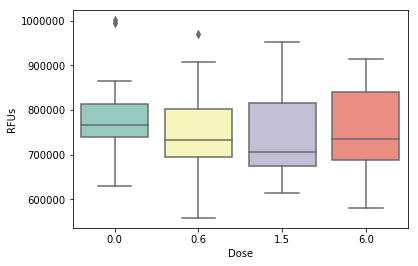

In [7]:
hr3=pd.read_excel("nluc_6_28_21_3hr.xlsx",index_col=0)
hr3
new_drug_np=[]
family=[4,5,8]
dose=[0,0.6,1.5,6]

for row in hr3.itertuples():
    i=0
    print(row)
    for value in row[1:]:
        if value<1000:
            pass
        else:
            new_drug_np.append([value,family[i//4],dose[i%4],3])   
        i+=1        
        
new_drug_df3=pd.DataFrame(new_drug_np)
new_drug_df3.columns=["RFUs","Family","Dose","Hours post Treatment"]
a2 = sns.boxplot(x="Dose", y="RFUs",data=new_drug_df3, palette="Set3")

Pandas(Index='A', _1=1302756, _2=1291074, _3=1295979, _4=1355782, _5=1482583, _6=1563451, _7=1638377, _8=1552649, _9=1571865, _10=1189329, _11=1596365, _12=1567052)
Pandas(Index='B', _1=1366080, _2=1343933, _3=1220836, _4=1279136, _5=1433906, _6=1445965, _7=1603276, _8=1796387, _9=1502759, _10=1567935, _11=1453223, _12=1607711)
Pandas(Index='C', _1=6, _2=1317364, _3=1281484, _4=1149539, _5=1679493, _6=1465575, _7=1501411, _8=1146984, _9=1307036, _10=1350821, _11=1251477, _12=1558305)
Pandas(Index='D', _1=5, _2=1242325, _3=3, _4=2, _5=1553903, _6=1437358, _7=1476383, _8=1485267, _9=1364314, _10=1308942, _11=1278599, _12=1219254)
Pandas(Index='E', _1=4, _2=3, _3=3, _4=3, _5=1572422, _6=1431582, _7=1475493, _8=1630627, _9=1490684, _10=1479776, _11=1325540, _12=2242591)
Pandas(Index='F', _1=5, _2=3, _3=3, _4=4, _5=1536644, _6=3, _7=1347605, _8=1507550, _9=1342864, _10=1505827, _11=1498528, _12=1310324)
Pandas(Index='G', _1=7, _2=3, _3=8, _4=2, _5=1504638, _6=2, _7=1342525, _8=1702153, _9=1

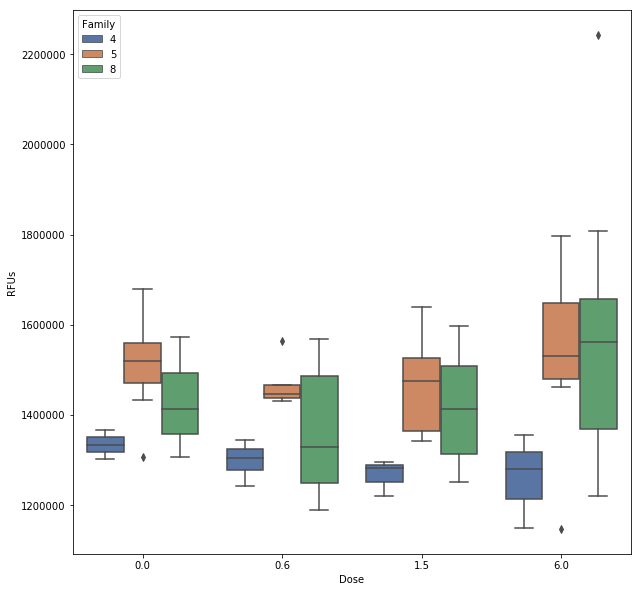

In [8]:
hr45=pd.read_excel("nluc_6_28_21_4.5hr.xlsx",index_col=0)
hr45
new_drug_np=[]
family=[4,5,8]
dose=[0,0.6,1.5,6]

for row in hr45.itertuples():
    i=0
    print(row)
    for value in row[1:]:
        if value<1000:
            pass
        else:
            new_drug_np.append([value,family[i//4],dose[i%4],4.5])   
        i+=1        
        
new_drug_df45=pd.DataFrame(new_drug_np)
new_drug_df45.columns=["RFUs","Family","Dose","Hours post Treatment"]
fig,ax2=plt.subplots(figsize=(10,10))
a2 = sns.boxplot(x="Dose", y="RFUs",hue="Family", data=new_drug_df45, palette="deep")

Pandas(Index='A', _1=1753944, _2=1541420, _3=1818435, _4=1994091, _5=1733532, _6=1917462, _7=2027577, _8=1905704, _9=9, _10=2300926, _11=2174721, _12=1033663)
Pandas(Index='B', _1=1795163, _2=1679797, _3=1722911, _4=1570078, _5=1752500, _6=1782135, _7=1892682, _8=2023852, _9=1778071, _10=1763796, _11=1818743, _12=1388288)
Pandas(Index='C', _1=6, _2=1707440, _3=5, _4=1451614, _5=1673891, _6=1876965, _7=2158401, _8=2000621, _9=1876346, _10=1879288, _11=1936640, _12=1431319)
Pandas(Index='D', _1=4, _2=1730975, _3=2, _4=6, _5=1671516, _6=1811290, _7=2022571, _8=1874220, _9=1693704, _10=1911928, _11=1620830, _12=878552)
Pandas(Index='E', _1=19, _2=4, _3=5, _4=3, _5=1576271, _6=2, _7=2064876, _8=1866647, _9=1808565, _10=1714495, _11=1847954, _12=498888)
Pandas(Index='F', _1=3, _2=4, _3=3, _4=4, _5=1559860, _6=3, _7=1859912, _8=1611353, _9=1693125, _10=1744406, _11=1722519, _12=914040)
Pandas(Index='G', _1=5, _2=3, _3=5, _4=4, _5=1681786, _6=3, _7=2091926, _8=1915028, _9=1762395, _10=1828889,

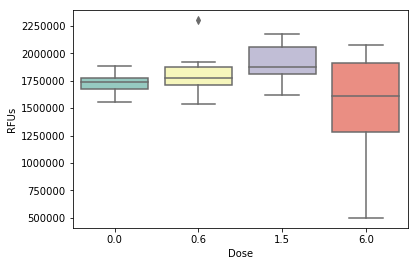

In [34]:
hr6=pd.read_excel("nluc_6_28_21_6hr.xlsx",index_col=0)

new_drug_np=[]
family=[4,5,8]
dose=[0,0.6,1.5,6]

for row in hr6.itertuples():
    i=0
    print(row)
    for value in row[1:]:
        if value<1000:
            pass
        else:
            new_drug_np.append([value,family[i//4],dose[i%4],6])   
        i+=1        
        
new_drug_df6=pd.DataFrame(new_drug_np)
new_drug_df6.columns=["RFUs","Family","Dose","Hours post Treatment"]
a2 = sns.boxplot(x="Dose", y="RFUs",data=new_drug_df6, palette="Set3")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Blank Injectant v.s. No Phenotype E1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.163e-02 U_stat=6.000e+01
No Phenotype E1 v.s. Phenotype E1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.439e-02 U_stat=5.500e+01
Blank Injectant v.s. Phenotype E1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.817e-03 U_stat=6.400e+01


(<matplotlib.axes._subplots.AxesSubplot at 0x7f86785f37b8>,
  <statannot.StatResult.StatResult at 0x7f867880c5c0>])

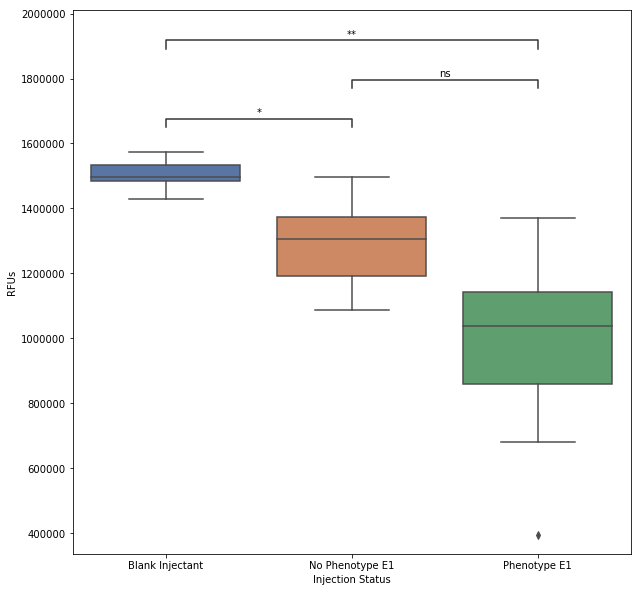

In [11]:
hrCR=pd.read_excel("nluc_6_28_21_CRISPR.xlsx",index_col=0)

new_drug_np=[]
family=["Blank Injectant","No Phenotype E1","Phenotype E1"]


for row in hrCR.itertuples():
    i=0

    for value in row[1:]:
        if value<1000:
            pass
        else:
            new_drug_np.append([value,family[i%3]])   
        i+=1        
        
CR=pd.DataFrame(new_drug_np)
CR.columns=["RFUs","Injection Status"]
fig, axCR = plt.subplots(figsize=(10,10))
sns.boxplot(ax=axCR,x="Injection Status", y="RFUs",data=CR, palette="deep")
box_pairs=[
    ("Blank Injectant","No Phenotype E1"), 
    ("No Phenotype E1","Phenotype E1"),
    ("Blank Injectant","Phenotype E1")
]
add_stat_annotation(axCR, data=CR, x="Injection Status", y="RFUs", text_format='star', loc='inside', verbose=2,test="Mann-Whitney",box_pairs=box_pairs)

In [35]:
full=pd.concat([new_drug_df15, new_drug_df3,new_drug_df45,new_drug_df6], ignore_index=True)
full

RFUs  Family  Dose  Hours post Treatment
0     460369.0       4   0.0                   1.5
1     555704.0       4   0.6                   1.5
2     409905.0       4   1.5                   1.5
3     455779.0       4   6.0                   1.5
4     387543.0       5   0.0                   1.5
..         ...     ...   ...                   ...
312  2073719.0       5   6.0                   6.0
313  1882056.0       8   0.0                   6.0
314  1643793.0       8   0.6                   6.0
315  1629660.0       8   1.5                   6.0
316  1184179.0       8   6.0                   6.0

[317 rows x 4 columns]

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6.0_0.0 v.s. 6.0_0.6: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=9.300e+01
4.5_0.0 v.s. 4.5_0.6: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.647e-01 U_stat=2.080e+02
1.5_0.0 v.s. 1.5_0.6: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.810e+02
3.0_0.0 v.s. 3.0_0.6: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.420e+02
6.0_0.0 v.s. 6.0_1.5: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.178e-02 U_stat=5.800e+01
1.5_0.0 v.s. 1.5_1.5: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.198e-01 U_stat=3.960e+02
3.0_0.0 v.s. 3.0_1.5: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.100e

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc963c01a90>,
  <statannot.StatResult.StatResult at 0x7fc96b965198>])

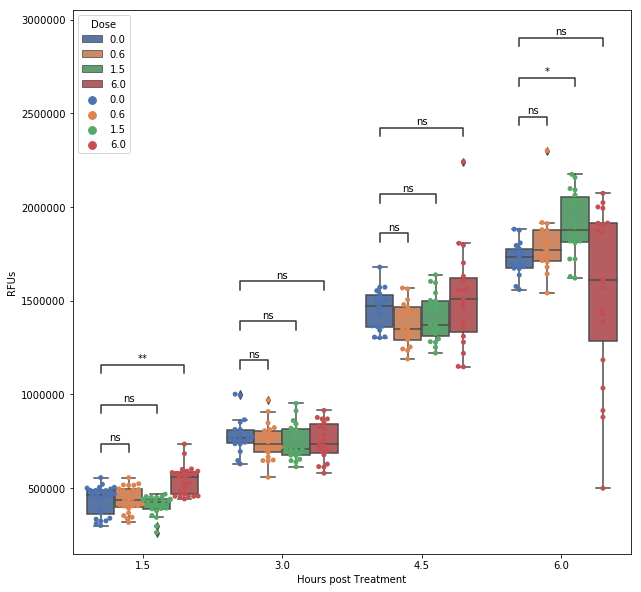

In [49]:
fig, ax3 = plt.subplots(figsize=(10,10))
sns.boxplot(ax=ax3,x="Hours post Treatment", y="RFUs",hue="Dose",data=full, palette="deep")
box_pairs=[
    ((1.5,0),(1.5,0.6)),
    ((1.5,0),(1.5,1.5)),
    ((1.5,0),(1.5,6)),
    ((3,0),(3,0.6)),
    ((3,0),(3,1.5)),
    ((3,0),(3,6)),
    ((4.5,0),(4.5,0.6)),
    ((4.5,0),(4.5,1.5)),
    ((4.5,0),(4.5,6)),
    ((6,0),(6,0.6)),
    ((6,0),(6,1.5)),
    ((6,0),(6,6))

]
sns.swarmplot(ax=ax3,x="Hours post Treatment", y="RFUs",hue="Dose",data=full,dodge=True,size=5,palette="deep")
add_stat_annotation(ax3, data=full, hue="Dose", x="Hours post Treatment", y="RFUs", text_format='star', loc='inside', verbose=2,test="Mann-Whitney",box_pairs=box_pairs)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Blank Injectant v.s. No Phenotype E1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.450e+01
No Phenotype E1 v.s. Phenotype E1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.163e-02 U_stat=4.000e+00
Blank Injectant v.s. Phenotype E1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.915e-03 U_stat=2.500e+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7f8678d58e48>,
  <statannot.StatResult.StatResult at 0x7f8678dd1630>])

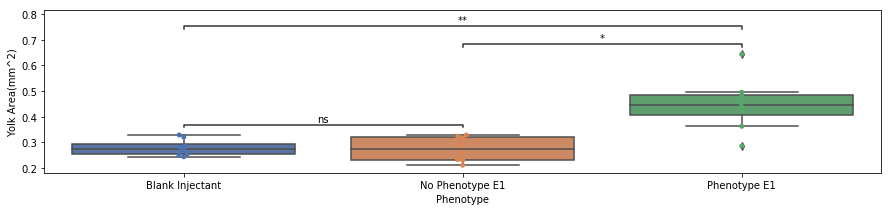

In [17]:
hryolk=pd.read_excel("CRISPR_yolk_sizes.xlsx",index_col=0)
fig,ax4=plt.subplots(figsize=(15,3))
sns.boxplot(ax=ax4,x="Phenotype", y="Yolk Area(mm^2)",data=hryolk, palette="deep")
sns.swarmplot(ax=ax4,x="Phenotype", y="Yolk Area(mm^2)",data=hryolk,dodge=True,size=5,palette="deep")
box_pairs=[
    ("Blank Injectant","No Phenotype E1"), 
    ("No Phenotype E1","Phenotype E1"),
    ("Blank Injectant","Phenotype E1")
]
add_stat_annotation(ax4, data=hryolk, x="Phenotype", y="Yolk Area(mm^2)", text_format='star', loc='inside', verbose=2,test="Mann-Whitney",box_pairs=box_pairs)